# Visualization 데이터 시각화 리포트
## 주제
- 코로나 이후 달라진 부산의 관광 변화
  - 코로나 이후 해외 여행의 금지로 인해 부산 국내 여행 소비자 증가할 것이다.

### 데이터 출처 
- 한국관광 데이터랩 (https://datalab.visitkorea.or.kr/datalab/portal/main/getMainForm.do)

### 데이터 정보
- 외국인 / 내국인 카드 소비 데이터
  -   기준년월
  -   광역지자체
  -   중분류
  -   지출액
  -   전년도 지출액

- 외국인 / 내국인 kt 통신 데이터
  - 기준년월
  - 기초지자체
  - 방문자 구분
  - 방문자 수
  - 전년도 방문자 수

- 부산광역시 주민등록인구통계
  - 구군
  - 동수(개소)
  - 세대수(세대)
  - 인구수(명)
  - 남자인구수(명)
  - 여자인구수(명)
  - 시전체 인구에 대한 구성비(퍼센트)
  - 면적(제곱킬로미터)
  - 인구밀도(제곱킬로미터 당 명수)


## 가설
- 가설1 : 부산의 구별 방문자수, 카드 소비 지출액, 인구 밀도는 연관성을 가진다.
- 가설 2-1: 코로나 이후 한국인(내지인)의 부산 관광 비중이 코로나 전보다 증가 하였을 것이다.
- 가설 2-2: 외국인의 비율은 감소하고 점점 증가하는 추세를 보일 것이다
- 가설 3:  내국인/ 외국인에 따라서 관광 소비 경향은 다를 것이다.
- 코로나 이후 더 증가한 소비 항목은 없을까?
- 가설 4: 코로나 이후 보복 소비로 인해 증가한 소비 항목들이 존재한다.
- 가설5 : 기장군의 롯데월드 개장으로 인해 관광 유원시설이 증가할 것이다.
---

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import folium

import json

import os
import glob

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from wordcloud import WordCloud


In [31]:
import chart_studio

username = 'pizzalist' # your username
api_key = '4K5bRUGkD9a1Gfni7Lva' # your api key - go to profile > settings > regenerate key
chart_studio.tools.set_credentials_file(username=username, api_key=api_key)

## 가설1 : 부산의 구별 방문자수, 카드 소비 지출액, 인구 밀도는 연관성을 가진다.

In [5]:
path = "./data/kt통신데이터/데이터정리파일/*"
kt_file_list = glob.glob(path)
kt_csv_list = [file for file in kt_file_list if file.endswith(".csv")]

kt_data_year = pd.read_csv(kt_csv_list[0], encoding='euc-kr')
for i in range(len(kt_csv_list)-1):
    kt_df_add = pd.read_csv(kt_csv_list[i+1], encoding='euc-kr')
    kt_data_year = pd.concat([kt_data_year, kt_df_add], axis=0)

kt_data_year = kt_data_year[kt_data_year["방문자 구분"] ==  '외지인방문자(b)']


## 부산 지역별 통신 테이터 기반 방문자수 지도 

In [7]:

busan_geo = './data/busan.json'

m = folium.Map(
    location=[35.212378, 128.980798],
    zoom_start=11, 
    tiles="cartodbpositron"
)

folium.GeoJson(
    busan_geo
).add_to(m)

m.choropleth(geo_data=busan_geo,
                data=kt_data_year, 
                columns=['기초지자체','방문자 수'],
                fill_color='YlOrRd', # 색상 변경도 가능하다
                fill_opacity=0.5,
                line_opacity=0.2,
                key_on='properties.name',
                legend_name="방문자 수"
            )
m

/Users/noah/miniconda3/envs/seminar/lib/python3.11/site-packages/folium/folium.py:465: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


In [8]:
population = pd.read_csv("./data/부산광역시 주민등록인구통계_20201231.csv", 
                        encoding="euc-kr")[["구군","인구밀도(제곱킬로미터 당 명수)"]]
population

,구군,인구밀도(제곱킬로미터 당 명수)
0,중구,15061
1,서구,7678
2,동구,9094
3,영도구,7919
4,부산진구,11997
5,동래구,16114
6,남구,9971
7,북구,7248
8,해운대구,7783
9,사하구,7426


In [9]:
busan_card = pd.read_csv("./data/부산_구별_카드지출액.csv", 
                        encoding="euc-kr")
busan_card

,기초지자체 명,기초지자체 지출액,기초지자체 지출액 비율
0,강서구,4.089498e+08,5.1
1,금정구,3.305362e+08,4.2
2,기장군,9.872752e+08,12.4
3,남구,2.750007e+08,3.5
4,동구,2.374114e+08,3.0
5,동래구,4.655688e+08,5.9
6,부산진구,1.066573e+09,13.4
7,북구,6.218267e+08,7.8
8,사상구,3.100161e+08,3.9
9,사하구,2.217443e+08,2.8


## 부산 구별 관광 소비 시각화

In [10]:

card_map = folium.Map(
    location=[35.212378, 128.980798],
    zoom_start=11, 
    tiles='cartodbpositron',
)

folium.GeoJson(
    busan_geo
).add_to(card_map)

card_map.choropleth(geo_data=busan_geo,
                data=busan_card, 
                columns=['기초지자체 명','기초지자체 지출액'],
                fill_color='YlOrRd', # 색상 변경도 가능하다
                fill_opacity=0.5,
                line_opacity=0.2,
                key_on='properties.name',
                legend_name="기초지자체 지출액"
            )
	

card_map

/Users/noah/miniconda3/envs/seminar/lib/python3.11/site-packages/folium/folium.py:465: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


## 부산 구별 인구밀도 시각화

In [11]:

busan_geo = './data/busan.json'

population_map = folium.Map(
    location=[35.212378, 128.980798],
    zoom_start=11, 
    tiles='cartodbpositron'
)

folium.GeoJson(
    busan_geo
).add_to(population_map)

population_map.choropleth(geo_data=busan_geo,
                data=population, 
                columns=['구군','인구밀도(제곱킬로미터 당 명수)'],
                fill_color='YlOrRd', # 색상 변경도 가능하다
                fill_opacity=0.5,
                line_opacity=0.2,
                key_on='properties.name',
                legend_name="인구밀도"
            )

population_map


/Users/noah/miniconda3/envs/seminar/lib/python3.11/site-packages/folium/folium.py:465: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


In [12]:
from functools import reduce
kt_data_year = kt_data_year[kt_data_year["기준년월"] == 2022]
kt_data_year = kt_data_year.rename(columns={'기초지자체':'구군'})
busan_card = busan_card.rename(columns={'기초지자체 명':'구군'})
population
data_list = [kt_data_year,busan_card,population]
corr_df = reduce(lambda x, y : pd.merge(x,y,on='구군'), data_list)
corr_df

,기준년월,구군,방문자 구분,방문자 수,전년도 방문자 수,기초지자체 지출액,기초지자체 지출액 비율,인구밀도(제곱킬로미터 당 명수)
0,2022,북구,외지인방문자(b),23030920.0,22362182.0,6.218267e+08,7.8,7248
1,2022,중구,외지인방문자(b),37722069.0,33966020.0,4.608049e+08,5.8,15061
2,2022,기장군,외지인방문자(b),41005926.0,37769613.0,9.872752e+08,12.4,821
3,2022,금정구,외지인방문자(b),28333676.0,25877372.0,3.305362e+08,4.2,3554
4,2022,사상구,외지인방문자(b),26808778.0,24341454.0,3.100161e+08,3.9,5893
5,2022,강서구,외지인방문자(b),37013578.0,32449991.0,4.089498e+08,5.1,812
6,2022,해운대구,외지인방문자(b),66520097.0,60211344.0,1.530841e+09,19.3,7783
7,2022,영도구,외지인방문자(b),18604467.0,16394802.0,9.307886e+07,1.2,7919
8,2022,수영구,외지인방문자(b),36961858.0,32291270.0,4.142550e+08,5.2,17304
9,2022,부산진구,외지인방문자(b),68965788.0,60791451.0,1.066573e+09,13.4,11997


Text(0.5, 1.0, '방문자 수와 관광 지출액의 상관관계')

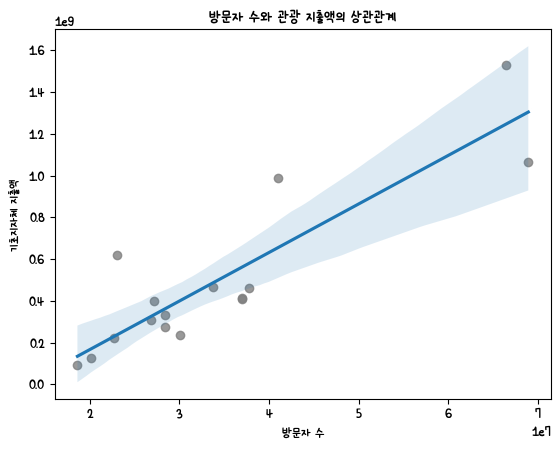

In [17]:
sns.regplot(x='방문자 수', y='기초지자체 지출액', data=corr_df, scatter_kws={'color': 'grey'})

plt.title('방문자 수와 관광 지출액의 상관관계')

부산의 구별 방문자의 수와 관광 지출액은 상관관계를 가진다.

Text(0.5, 1.0, '방문자 수와 인구밀도(제곱킬로미터 당 명수)의 상관관계')

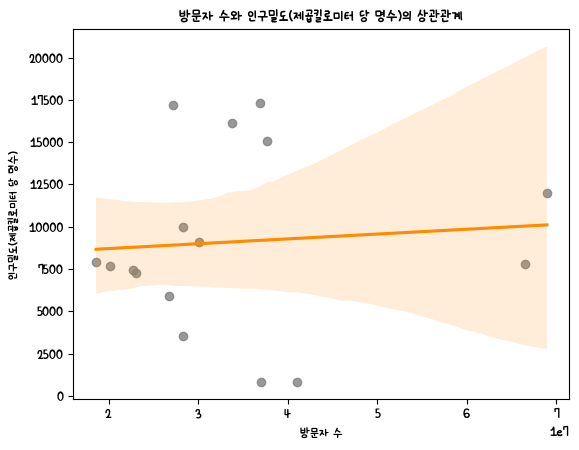

In [18]:
sns.regplot(x='방문자 수', y='인구밀도(제곱킬로미터 당 명수)', data=corr_df,
            line_kws={'color': 'darkorange'}, scatter_kws={'color': 'grey'})
plt.title('방문자 수와 인구밀도(제곱킬로미터 당 명수)의 상관관계')

부산의 구별 방문자의 수와 인구 밀도는 상관관계를 가지지 않는다고 해석해야 한다.

## 가설2: 코로나 이후 한국인(내지인)의 부산 관광 비중이 코로나 전보다 증가 하였을 것이다.
### 외국인의 비율은 감소하고 점점 증가하는 추세를 보일 것이다
- 해외 여행의 통제로 인해 국내 여행을 하는 인원이 많아졌을것이라 판단


In [19]:
#local 파일내 데이터 합치기
path = "./data/card_data/local/*"
card_file_list = glob.glob(path)
card_csv_list = [file for file in card_file_list if file.endswith(".csv")]

card_data_year = pd.read_csv(card_csv_list[0], encoding='euc-kr')
for i in range(len(card_csv_list)-1):
    card_df_add = pd.read_csv(card_csv_list[i+1], encoding='euc-kr')
    card_data_year = pd.concat([card_data_year, card_df_add], axis=0)

#goreigner 파일내 데이터 합치기
path = "./data/card_data/foreigner/*"
f_card_file_list = glob.glob(path)
f_card_csv_list = [file for file in f_card_file_list if file.endswith(".csv")]

f_card_data_year = pd.read_csv(f_card_csv_list[0], encoding='euc-kr')
for i in range(len(f_card_csv_list)-1):
    f_card_df_add = pd.read_csv(f_card_csv_list[i+1], encoding='euc-kr')
    f_card_data_year = pd.concat([f_card_data_year, f_card_df_add], axis=0)

card_data_year['country'] = 'local'
f_card_data_year['country'] = 'foreigner'

# 두개 합치기 
card_data_year = pd.concat([card_data_year, f_card_data_year], axis=0)

card_data_year['기준년월'] = pd.to_datetime(card_data_year['기준년월'], format='%Y%m')
card_data_year['기준년월'] = card_data_year['기준년월'].dt.strftime('%Y-%m')
card_data_year = card_data_year.drop(["Unnamed: 3"],axis=1)
card_data_year = card_data_year.fillna(0)
card_data_year = card_data_year.sort_values(by='기준년월')
card_data_year['Year'] = card_data_year['기준년월'].str[:4]
card_data_year

,기준년월,광역지자체,중분류,지출액,전년도 지출액,country,Year
0,2018-01,부산광역시,관광총소비,266602929.0,0.0,local,2018
8,2018-01,부산광역시,면세점,2736906.0,0.0,foreigner,2018
7,2018-01,부산광역시,렌터카,18372.0,0.0,foreigner,2018
6,2018-01,부산광역시,항공운송,1460.0,0.0,foreigner,2018
5,2018-01,부산광역시,수상운송,7071.0,0.0,foreigner,2018
...,...,...,...,...,...,...,...
245,2022-12,부산광역시,카지노,5208420.0,212500.0,foreigner,2022
246,2022-12,부산광역시,관광유원시설,230283.0,19541.0,foreigner,2022
247,2022-12,부산광역시,골프장,22224.0,11475.0,foreigner,2022
249,2022-12,부산광역시,기타레저,195.0,30.0,foreigner,2022


In [20]:
total_card_year = card_data_year[card_data_year['중분류'] == '관광총소비']
total_card_year['기준년월'] = pd.to_datetime(total_card_year['기준년월'], format='%Y-%m')
local = total_card_year[total_card_year['country'] == 'local']
foreigner = total_card_year[total_card_year['country'] == 'foreigner']

/var/folders/gv/52872pfs52b8ktyt5ghd32_40000gn/T/ipykernel_87712/766983595.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_card_year['기준년월'] = pd.to_datetime(total_card_year['기준년월'], format='%Y-%m')


In [21]:

local_total = local.groupby("Year").agg({
                    "지출액" : "sum"
                }).reset_index()

foreigner_total = foreigner.groupby("Year").agg({
                    "지출액" : "sum"
                }).reset_index()


In [34]:
data1 = go.Bar(x=local_total['Year'], y=local_total['지출액'], name='내국인')
data2 = go.Bar(x=foreigner_total['Year'], y=foreigner_total['지출액'], name='외국인')
layout = go.Layout(title='연도별 부산 관광 소비') # Title 설정

# 생성된 Bar 클래스를 리스트로 만들어 data 인자로 설정
fig = go.Figure(data=[data1, data2], layout=layout)
fig.show()

In [35]:
py.plot(fig, filename = 'consumption_year', auto_open=True)

'https://plotly.com/~pizzalist/1/'

In [36]:

fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(go.Scatter(x=local['기준년월'], y=local['지출액'], mode='lines', name="내국인"))
fig.update_layout(
    title='부산 관광 소비 항목',
    xaxis_title='Year',
    legend=dict(
        title='Category',
        orientation='h',
        yanchor='bottom',
        y=1.02,
        xanchor='right',
        x=1,
    ),
    width=750,
    height=400,
    hovermode='x',
    yaxis2=dict(
        title='기장군 소비액',
        titlefont=dict(color='black'),
        tickfont=dict(color='black'),
        overlaying='y',
        side='right',
        position=0.95
    )
    
)
fig.update_xaxes(range=['2022-03', '2022-12'])
fig.add_trace(go.Scatter(x=foreigner['기준년월'], y=foreigner['지출액'], mode='lines', name='외국인'),
secondary_y = False)
fig.add_vrect(
    x0="2020-03-01", x1="2022-04-26",
    fillcolor="LightSalmon", opacity=0.5,
    layer="below", line_width=0,
)
fig.show()

## 가설 3:  내국인/ 외국인에 따라서 관광 소비 경향은 다를 것이다.
외국인은 해외 여행인 만큼 호텔에 더 큰 비중을 소비할 것이다.

In [39]:
card_data_year = card_data_year.drop(card_data_year[card_data_year['중분류'] == '관광총소비'].index)
pivot = card_data_year.pivot_table(index=['country', 'Year'], columns='중분류', values='지출액', aggfunc='sum')
pivot = pivot.fillna(0)
country_list = pivot.index.get_level_values(0).unique()
year_list = pivot.index.get_level_values(1).unique()

In [53]:

local_2022 = pivot.loc[('local',"2018")]
local_2022 = local_2022.sort_values(ascending=False).head(5)
foreigner_2022 = pivot.loc[('foreigner',"2018")]
foreigner_2022 = foreigner_2022.sort_values(ascending=False).head(5)


local_pie = go.Pie(labels=local_2022.index, values=local_2022, hole=.6)
foreigner_pie = go.Pie(labels=foreigner_2022.index, values=foreigner_2022, hole=.3)

fig = go.Figure(data=[foreigner_pie, local_pie])
# f = fig.full_figure_for_development(warn=False)
fig.update_layout(width = 600, title_text="부산 2018 카드 지출 동향 (밖:내국인, 안:외국인)")
fig.data[0].domain = {'x': [0, 1], 'y': [0.25, 0.75]}
fig.update_traces(hoverinfo='label+percent', textinfo='label', textfont_size=10, 
                  marker=dict( line=dict(color='#000000', width=2)))
fig.show()

In [54]:
py.plot(fig, filename = 'card_consumption', auto_open=True)

'https://plotly.com/~pizzalist/5/'

In [56]:


title_list = ['2018 내국인','2018 외국인','2019 내국인','2019 외국인','2020 내국인','2020 외국인',\
    '2021 내국인','2021 외국인','2022 내국인','2022 외국인']

fig = make_subplots(rows=5, cols=2, specs=[[{'type': 'domain'}, {'type': 'domain'}]]*5,
                    subplot_titles=title_list)
for i, year in enumerate(year_list):
    data_year = pivot.loc[('local',str(year))]
    data_year = data_year.sort_values(ascending=False).head(5)
    fig.add_trace(go.Pie(labels=data_year.index, values=data_year, hole=.3,
                            name=('외국인 '+str(year) + '년' + '카드 지출 동향')),
                  row=i+1, col=1)

for i, year in enumerate(year_list):
    data_year = pivot.loc[('foreigner',str(year))]
    data_year = data_year.sort_values(ascending=False).head(5)
    fig.add_trace(go.Pie(labels=data_year.index, values=data_year, hole=.3,
                        name=('외국인 '+str(year) + '년' + '카드 지출 동향')),
                  row=i+1, col=2, )


fig.update_layout(height=1000, width=500, title_text="내국인 및 외국인 카드 지출 동향")
fig.update_traces(hoverinfo='label+percent', textinfo='label', textfont_size=10, 
                  marker=dict( line=dict(color='#000000', width=2)))
fig.show()
py.plot(fig, filename = 'card_consumption_fore', auto_open=True)

'https://plotly.com/~pizzalist/7/'

## 코로나 이후 증가한 소비 항목은 없을까?

In [57]:

card_data_year
local_pivot = pivot.loc['local']
local_pivot_year = local_pivot.pivot_table(index='Year')

grater_than_2019 = local_pivot_year.columns[local_pivot_year.loc['2022'] > local_pivot_year.loc['2019']]
card_data_year_filtered = card_data_year.loc[card_data_year['중분류'].isin(grater_than_2019)]
card_data_year_filtered = card_data_year_filtered[card_data_year_filtered["country"] == "local"]

In [59]:
card_data_year_filtered['기준년월'] = pd.to_datetime(card_data_year_filtered['기준년월'], format='%Y-%m')

# 중분류 컬럼에서 고유한 값들을 추출하여 categoty 리스트에 저장
category = card_data_year_filtered['중분류'].unique().tolist()
# # 그래프 객체 생성
fig = go.Figure()

# 각 중분류에 대하여 그래프를 추가
for cat in category:
    # 중분류가 cat인 행들만 선택하여 그래프에 추가
    temp = card_data_year_filtered[card_data_year_filtered['중분류']==cat]
    fig.add_trace(go.Scatter(x=temp['기준년월'], y=temp['지출액'], mode='lines', name=cat))

# 그래프 레이아웃 설정
fig.update_layout(
    title='부산 내국인 코로나 이후 증가한 관광 소비 항목',
    xaxis_title='Year',
    yaxis_title='Sales',
    legend=dict(
        title='Category',
        orientation='h',
        yanchor='bottom',
        y=1.02,
        xanchor='right',
        x=1,
    ),
    width=750,
    height=400,
    hovermode='x',
    
)
fig.add_vrect(
    x0="2020-03-01", x1="2022-04-26",
    fillcolor="LightSalmon", opacity=0.5,
    layer="below", line_width=0,
)
fig.show()
py.plot(fig, filename = 'card_consumption_category', auto_open=True)

'https://plotly.com/~pizzalist/9/'

In [61]:
from plotly.subplots import make_subplots

# 중분류 컬럼에서 고유한 값들을 추출하여 category 리스트에 저장
category = card_data_year_filtered['중분류'].unique().tolist()

# 그래프 객체 생성
fig = make_subplots(rows=3, cols=2, subplot_titles=category)

# 각 중분류에 대하여 그래프를 추가
for i, cat in enumerate(category):
    # 중분류가 cat인 행들만 선택하여 그래프에 추가
    temp = card_data_year_filtered[card_data_year_filtered['중분류']==cat]
    row = i // 2 + 1  # 행 번호 계산
    col = i % 2 + 1  # 열 번호 계산
    fig.add_trace(go.Scatter(x=temp['기준년월'], y=temp['지출액'], mode='lines', name=cat), row=row, col=col)

# 그래프 레이아웃 설정
fig.update_layout(
    title='부산 내국인 코로나 이후 증가한 관광 소비 항목',
    xaxis_title='Year',
    yaxis_title='Sales',
    width=900,
    height=750,
    hovermode='x',
)

fig.show()
py.plot(fig, filename = 'consumption_incr_category', auto_open=True)

'https://plotly.com/~pizzalist/12/'

- 골프장: 코로나와 관계없이 지속적으로 증가하는 경향을 보인다.
- 관광기념품, 항공운송, 호텔, 캠핑장/펜션, 호텔은 코로나 이전보다 더 높은 소비를 하였다.
  - 내지인들의 국내 관광에 대한 소비가 높아졌다
- 관광유원시설 : 그래프가 특이하다.
---

## 네비게이션 검색수 1~2월 과 4~5월 비교해보기!
###검색량 증가율 시각화

In [34]:
def keyword_vi(data):
    df = pd.read_csv(f"{data}", encoding="utf-8")
    df = df.head(15)
    wc = df.set_index("관광지명").to_dict()["diff"]

    wordCloud = WordCloud(
        font_path= "./data/온글잎 팀랩콩콩체.ttf",  # 실제 사용할 폰트 파일 경로
        width = 400,
        height = 400,
        max_font_size = 100,
        background_color = 'white'
    ).generate_from_frequencies(wc)

    plt.figure()
    plt.imshow(wordCloud)
    plt.axis('off')
    plt.title(f"{data}")

Text(0.5, 1.0, '1~5월 부산 네비게이션 검색량 증가율 키워드 시각화')

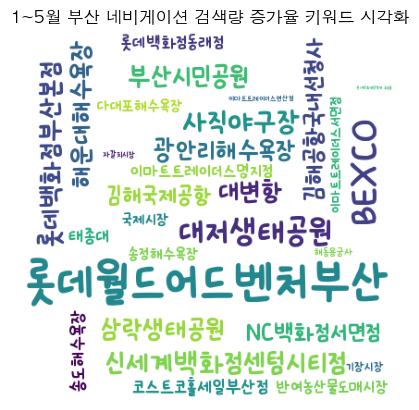

In [35]:
a = pd.read_csv("./data/busan_search/01_02.csv", encoding="utf-8")
b = pd.read_csv("./data/busan_search/04_05.csv", encoding="utf-8")
keyword = pd.merge(b, a, on='관광지명', how='left', suffixes=['_a', '_b'])
keyword['diff'] = keyword['검색건수_a'] - keyword['검색건수_b']
df = keyword.fillna(0).head(30)
wc = df.set_index("관광지명").to_dict()["diff"]

wordCloud = WordCloud(
    font_path= "./data/온글잎 팀랩콩콩체.ttf",  # 실제 사용할 폰트 파일 경로
    width = 400,
    height = 400,
    max_font_size = 100,
    background_color = 'white'
).generate_from_frequencies(wc)

plt.figure()
plt.imshow(wordCloud)
plt.axis('off')
plt.title("1~5월 부산 네비게이션 검색량 증가율 키워드 시각화")

## 정말 롯데월드 어드벤처 부산의 영향일까?
가설 : 기장군의 롯데월드 개장으로 인해 관광 유원시설이 증가할 것이다.

In [62]:
gijang_df = pd.read_csv("./data/card_data/card_기장.csv", encoding="EUC-KR")
gijang_attraction = gijang_df[gijang_df["중분류"] == '관광유원시설']
gijang_attraction['기준년월'] = pd.to_datetime(gijang_attraction['기준년월'], format='%Y%m')
gijang_attraction

/var/folders/gv/52872pfs52b8ktyt5ghd32_40000gn/T/ipykernel_87712/153345509.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,기준년월,기초지자체,중분류,지출액,전년도 지출액
9,2022-03-01,기장군,관광유원시설,29794.0,7883.0
23,2022-04-01,기장군,관광유원시설,429067.0,6168.0
37,2022-05-01,기장군,관광유원시설,450945.0,7342.0
51,2022-06-01,기장군,관광유원시설,292468.0,5993.0
66,2022-07-01,기장군,관광유원시설,320729.0,5771.0
81,2022-08-01,기장군,관광유원시설,427321.0,5827.0
95,2022-09-01,기장군,관광유원시설,426250.0,7226.0
110,2022-10-01,기장군,관광유원시설,508602.0,7756.0
125,2022-11-01,기장군,관광유원시설,266002.0,5559.0
140,2022-12-01,기장군,관광유원시설,171702.0,4395.0


In [64]:
fig = make_subplots(specs=[[{"secondary_y": True}]])
temp = card_data_year_filtered[card_data_year_filtered['중분류']=='관광유원시설']
fig.add_trace(go.Scatter(x=temp['기준년월'], y=temp['지출액'], mode='lines', name="부산관광유원시설"))
fig.update_layout(
    title='부산 관광유원시설 - 기장 관광유원시설 ',
    xaxis_title='Year',
    legend=dict(
        title='Category',
        orientation='h',
        yanchor='bottom',
        y=1.02,
        xanchor='right',
        x=1,
    ),
    width=750,
    height=400,
    hovermode='x',
    yaxis2=dict(
        title='기장군 소비액',
        titlefont=dict(color='black'),
        tickfont=dict(color='black'),
        overlaying='y',
        side='right',
        position=0.95
    )
    
)
fig.update_xaxes(range=['2022-03', '2022-12'])
fig.add_trace(go.Scatter(x=gijang_attraction['기준년월'], y=gijang_attraction['지출액'], mode='lines', name='기장군 총소비액'),
secondary_y = True)
fig.show()
py.plot(fig, filename = 'gijang', auto_open=True)

'https://plotly.com/~pizzalist/14/'

부산 전체의 관광유원시설 소비량과 기장군의 관광유원시설의 그래프 변화가 연관성을 띈다.
그렇다면,
가설: 이렇게 부산에 영향을 준 롯데월드의 개장이 기장군 관광 총 소비에 영향을 끼칠까?

In [65]:
gijang_total = gijang_df[gijang_df["중분류"] == '관광총소비'];
gijang_total['기준년월'] = pd.to_datetime(gijang_total['기준년월'], format='%Y%m');

/var/folders/gv/52872pfs52b8ktyt5ghd32_40000gn/T/ipykernel_87712/4100460902.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [66]:

fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(go.Scatter(x=gijang_attraction['기준년월'], y=gijang_attraction['지출액'], mode='lines', name="기장관광유원시설"))
fig.update_layout(
    title='기장 관광유원시설 - 기장 관광 소비 항목',
    xaxis_title='Year',
    legend=dict(
        title='Category',
        orientation='h',
        yanchor='bottom',
        y=1.02,
        xanchor='right',
        x=1,
    ),
    width=750,
    height=400,
    hovermode='x',
    yaxis2=dict(
        title='기장군 소비액',
        titlefont=dict(color='black'),
        tickfont=dict(color='black'),
        overlaying='y',
        side='right',
        position=0.95
    )
    
)
fig.update_xaxes(range=['2022-03', '2022-12'])
fig.add_trace(go.Scatter(x=gijang_total['기준년월'], y=gijang_total['지출액'], mode='lines', name='기장 총소비액'),
secondary_y = True)
fig.show()
py.plot(fig, filename = 'gijang_consumption', auto_open=True)

'https://plotly.com/~pizzalist/16/'

한 지역의 네이밍 랜드마크가 주변 관광 소비에 미치는 영향이 크다는 것을 확인할 수 있다.

위 데이터 시각화를 기반으로 봤을때, 부산 관광은 외국인 부분은 쇼핑, 호텔, 카지노와 같은 항목을 코로나 이전으로 회복시킨다.
내지인들은 모든 소비가 코로나 이전보다 증가한 것은 아니지만 일정 수준까지 회복이 된 상태이며, 랜드마크의 영향으로 의외로 방문객이 증가한 현상도 있었다. 또한, 호텔, 관광기념품, 비행운송은 코로나 이후 회복, 증가하고 있는 상태이다. 특이하게, 골프장의 수요는 코로나에 상관없이 계속 증가한다.